<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE256-AdvDataMining/blob/main/Image_Data_Mining_LBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install skimage if it's not already installed

In [ ]:
!pip install scikit-image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Import the necessary libraries:

In [ ]:
from skimage.feature import local_binary_pattern
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

# 3. Define the function to calculate LBP histogram:

In [ ]:
# Function to calculate LBP histogram
def lbp_histogram(image, method='uniform'):
    # Convert to grayscale
    gray_image = rgb2gray(image)
    # Apply LBP
    lbp_image = local_binary_pattern(gray_image, P=8, R=1, method=method)
    # Calculate histogram
    (hist, _) = np.histogram(lbp_image.ravel(),
                             bins=np.arange(0, 59), # 58 is the number of possible patterns for P=8 in uniform LBP
                             range=(0, 58))
    # Normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist, lbp_image

# 4. Read and process each image, and calculate the LBP histograms:

In [ ]:
# Assuming you have the images in your Google Drive or local runtime
# Replace 'path_to_image' with the actual path to your images

image_paths = ['/content/drive/MyDrive/SJSU/Sem1/CMPE256 - Advanced Data Mining/Assign5/LBP 1.png', '/content/drive/MyDrive/SJSU/Sem1/CMPE256 - Advanced Data Mining/Assign5/LBP 2.png', '/content/drive/MyDrive/SJSU/Sem1/CMPE256 - Advanced Data Mining/Assign5/LBP 3.png']
lbp_histograms = []
lbp_images = []

for path in image_paths:
    # Read the image
    image = imread(path)
    hist, lbp_image = lbp_histogram(image)
    lbp_histograms.append(hist)
    lbp_images.append(lbp_image)

# 5. Plot the histograms and LBP images:

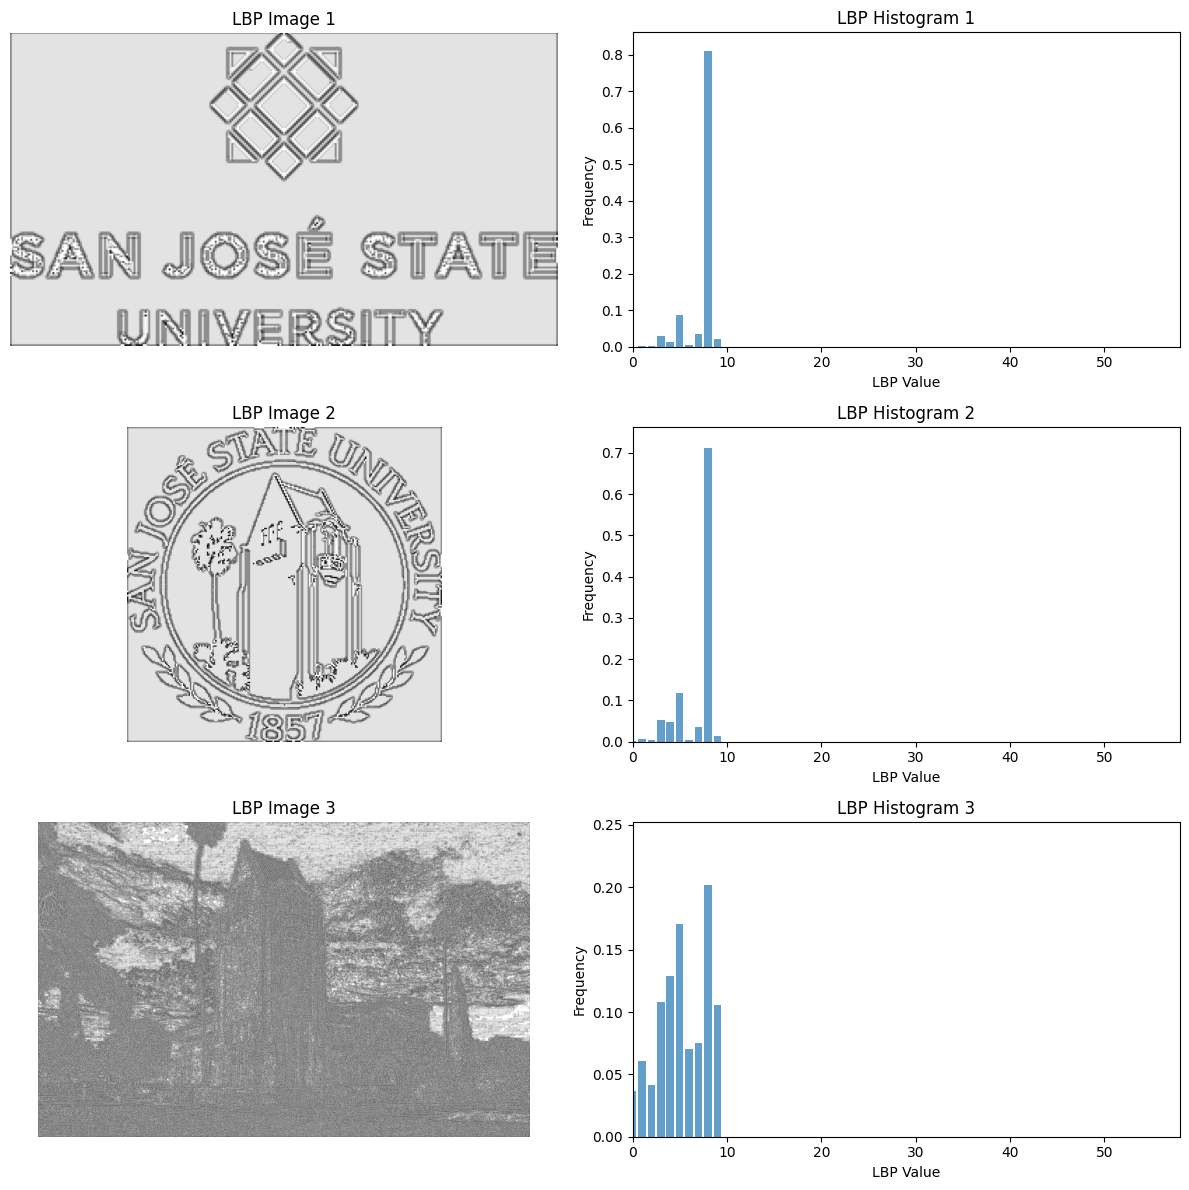

In [ ]:
# Plot the histograms and LBP images
fig, axs = plt.subplots(len(lbp_histograms), 2, figsize=(12, len(lbp_histograms) * 4))

for i, (hist, lbp_image) in enumerate(zip(lbp_histograms, lbp_images)):
    # Show LBP image
    axs[i, 0].imshow(lbp_image, cmap='gray')
    axs[i, 0].axis('off')
    axs[i, 0].set_title(f'LBP Image {i+1}')

    # Plot histogram
    axs[i, 1].bar(np.arange(0, 58), hist, width=0.8, alpha=0.7)
    axs[i, 1].set_xlim([0, 58])
    axs[i, 1].set_ylim([0, max(hist) + 0.05])
    axs[i, 1].set_title(f'LBP Histogram {i+1}')
    axs[i, 1].set_xlabel('LBP Value')
    axs[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The Local Binary Patterns (LBP) analysis has been completed for the three images. Here's a summary of the output:

**LBP Image 1:** The first image shows the Local Binary Pattern representation of what appears to be a logo or emblem. The corresponding histogram is heavily skewed towards the lower LBP values, indicating that most of the patterns are uniform and concentrated in the lower end of the LBP spectrum.

**LBP Image 2:** The second image also shows the LBP of a logo or emblem with a similar distribution in the histogram as the first image, suggesting that the texture characteristics are somewhat similar, with a focus on uniform patterns.

**LBP Image 3:** The third image presents the LBP of a building and its surroundings. This histogram is more spread out compared to the first two, indicating a richer texture with a wider variety of local binary patterns.

Each histogram displays the frequency of different LBP values occurring in the image, normalized to sum up to 1. The x-axis represents the LBP value (from 0 to 57, corresponding to the uniform patterns possible with P=8), and the y-axis represents the normalized frequency of each pattern. Uniform LBP methods are used, which is why there are 58 bins instead of the 256 possible for an 8-bit LBP.

The histograms are a compact summary of the texture information in the images, which can be used for various applications such as image matching, texture analysis, or as a feature in machine learning models.